# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv', index_col='id')
messages.head()

,message,original,genre
id,,,
2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('categories.csv', index_col='id')
categories.head()

,categories
id,
2,related-1;request-0;offer-0;aid_related-0;medi...
7,related-1;request-0;offer-0;aid_related-1;medi...
8,related-1;request-0;offer-0;aid_related-0;medi...
9,related-1;request-1;offer-0;aid_related-1;medi...
12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [4]:
# merge datasets
df = pd.concat([messages, categories], axis=1)
df.head()

,message,original,genre,categories
id,,,,
2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [5]:
# create a dataframe of the 36 individual category columns
categories = categories['categories'].str.split(';', expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
id,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [6]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
# since we took first row there are category target values in our list
# spliting category boolean values will be a better category representation idea
splited_list = []
for category in row.tolist():
    category, _ = category.split('-')
    splited_list.append(category)
    
# define category column names with cleaned category names    
category_colnames = splited_list
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [7]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [8]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].transform(lambda x: str(x[-1]))
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])

categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [9]:
# drop the original categories column from `df`
df.drop('categories', axis=1, inplace=True)

df.head()

,message,original,genre
id,,,
2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [10]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)

df.head()

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,
2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [11]:
# check number of duplicates
num_of_duplicates = df.message.shape[0] - df.message.nunique()
num_of_duplicates

71

In [12]:
# drop duplicates
df.drop_duplicates(subset='message',inplace=True)

In [13]:
# check number of duplicates
num_of_duplicates = df.message.shape[0] - df.message.nunique()
num_of_duplicates

0

### 6.1 Exploratary Analysis.
- Check emptyness percentages of columns.
- Remove columns that have high percentage.
- Some visualizations for understanding data.


In [14]:
# Print emptyness percentages of columns.
for column in df.columns:
    print(column, ': ', df[column].isnull().sum()/df[column].shape[0])

message :  0.0
original :  0.612140428621
genre :  0.0
related :  0.0
request :  0.0
offer :  0.0
aid_related :  0.0
medical_help :  0.0
medical_products :  0.0
search_and_rescue :  0.0
security :  0.0
military :  0.0
child_alone :  0.0
water :  0.0
food :  0.0
shelter :  0.0
clothing :  0.0
money :  0.0
missing_people :  0.0
refugees :  0.0
death :  0.0
other_aid :  0.0
infrastructure_related :  0.0
transport :  0.0
buildings :  0.0
electricity :  0.0
tools :  0.0
hospitals :  0.0
shops :  0.0
aid_centers :  0.0
other_infrastructure :  0.0
weather_related :  0.0
floods :  0.0
storm :  0.0
fire :  0.0
earthquake :  0.0
cold :  0.0
other_weather :  0.0
direct_report :  0.0


In [15]:
# it seems most of the original column is emtpy.
# lets explore emptyness according to genre.
print('Genre: Direct, Original Column Emptyness: ', df[df['genre']=='direct']['original'].isnull().sum()/df[df['genre']=='direct']['original'].shape[0])
print('Genre: Social, Original Column Emptyness: ', df[df['genre']=='social']['original'].isnull().sum()/df[df['genre']=='social']['original'].shape[0])
print('Genre: News, Original Column Emptyness: ', df[df['genre']=='news']['original'].isnull().sum()/df[df['genre']=='news']['original'].shape[0])
# it seems social and news massages has not any original column values.
#lets print some of the empty rows for more intuation
print(df[df['genre']=='social'].head())
print(df[df['genre']=='news'].head())

# it seems english social and news messages has no original values
# since they dont needed any translation while database's creation
# therefore i've decided to drop this column
df.drop('original', axis=1, inplace=True)

Genre: Direct, Original Column Emptyness:  0.0552712384852
Genre: Social, Original Column Emptyness:  1.0
Genre: News, Original Column Emptyness:  1.0
                                                 message original   genre  \
id                                                                          
11186  My thoughts and prayers go out to all the live...      NaN  social   
11188  I m sorry for the poor people in Haiti tonight...      NaN  social   
11189  RT selenagomez UNICEF has just announced an em...      NaN  social   
11192  lilithia yes 5.2 magnitude earthquake hit mani...      NaN  social   
11193  RT TheNewsBlotter RT caribnews On Call Interna...      NaN  social   

       related  request  offer  aid_related  medical_help  medical_products  \
id                                                                            
11186        1        0      0            0             0                 0   
11188        1        0      0            0             0               

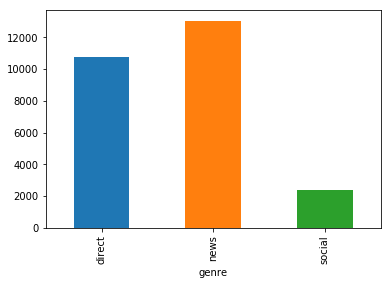

In [16]:
# lets look genre distribution of messages
df.groupby('genre')['message'].count().plot(kind='bar', figsize=(6,4))
# it seems most of the mesagges comes forom news then direct messages

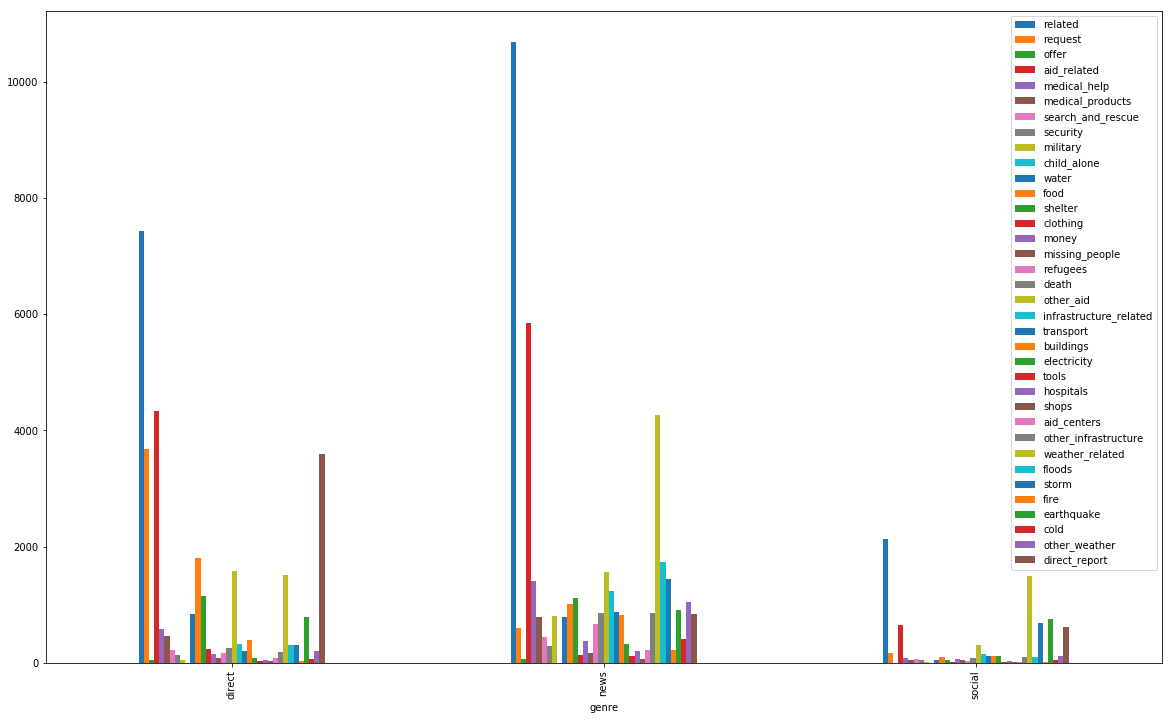

In [17]:
# lets look genre distribution of categories
df.groupby('genre').sum().plot(kind='bar', figsize=(20,12))
# it seems related, request, aid_realated, weather_related and direct_report
# categories are more common in messages

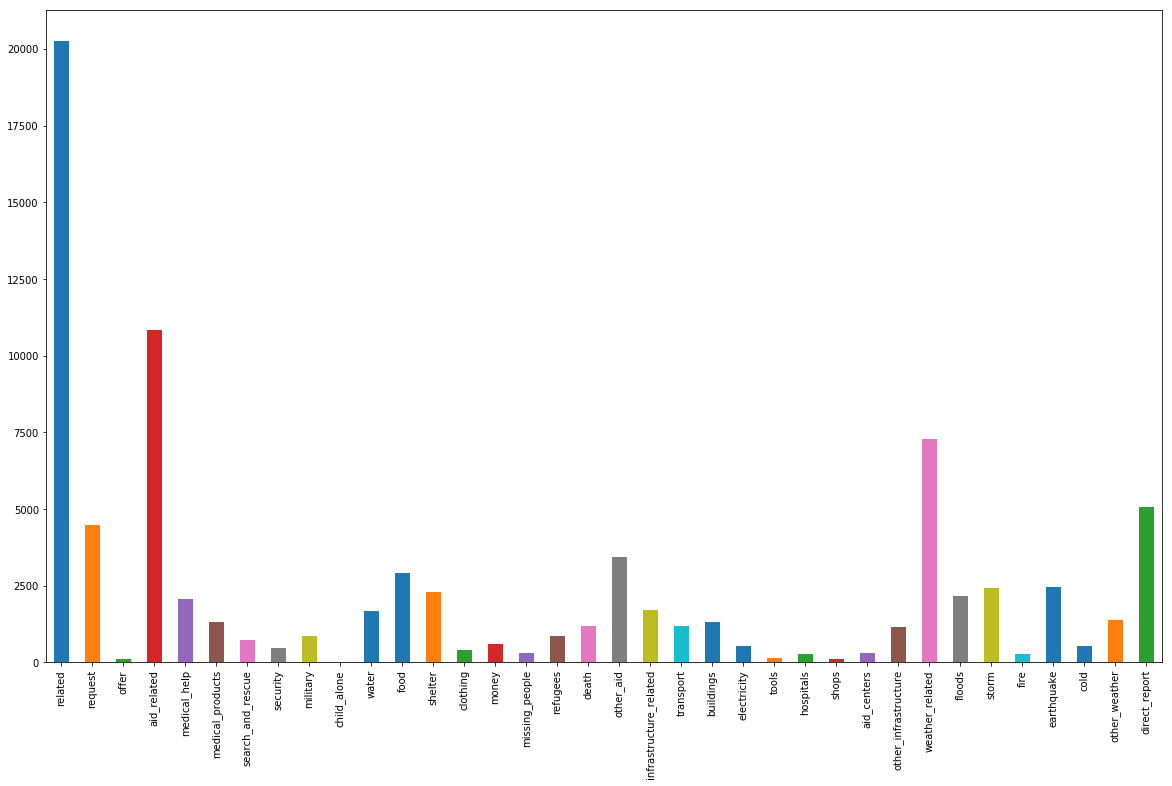

In [18]:
# lets look categories as a whole
df.drop(['message', 'genre'], axis=1).sum().plot(kind='bar', figsize=(20,12))
# it seems our intuation from previous table is true.

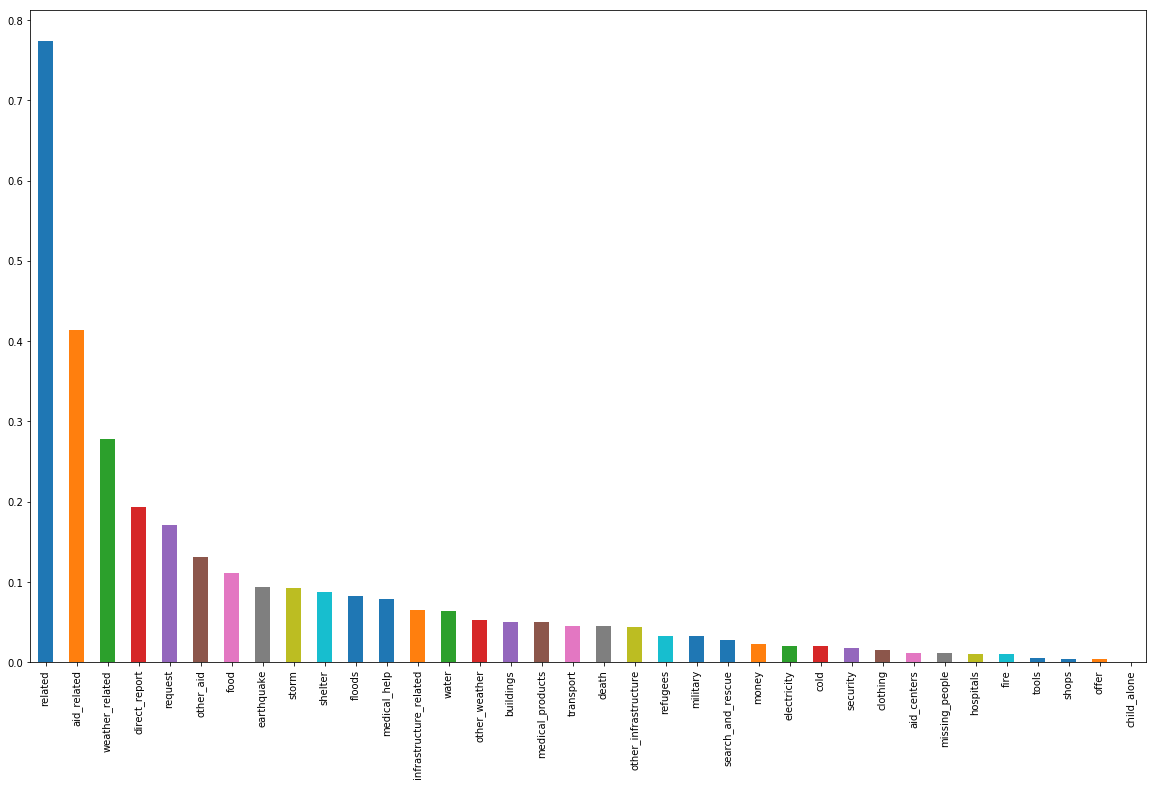

In [19]:
# lets look categories' distribution
(df.drop(['message', 'genre'], axis=1).sum()/df.shape[0]).sort_values(ascending=False).plot(kind='bar', figsize=(20,12))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


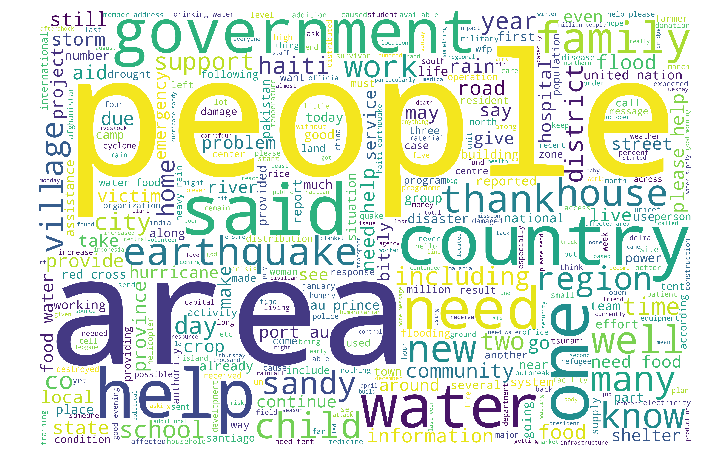

In [20]:
# finally lets try to create a word cloud
# Libraries for tokenization function
import re
import nltk
from wordcloud import WordCloud

nltk.download(['wordnet', 'stopwords', 'punkt'])
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def tokenize(text):
    # 2. Write a tokenization function to process your text data
    '''
    This function takes a text
    cleans from punctiation, tokenize it
    and remove english stop words
    then returns list constructed by tokenized text elements.

    input : a collection of test messages such as list/dataframe.
    output : a cleaned and tokenized list.
    '''

    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    wnlm = WordNetLemmatizer()
    words = [wnlm.lemmatize(word) for word in words if word not in stopwords.words('english')]

    return words

text = tokenize(''.join(message for message in df['message'].values))

w_cloud = WordCloud(width=4800, height=3200, max_words=400, background_color = 'white')
cloud = w_cloud.generate(' '.join(text))

plt.figure(figsize = (12,8))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('word_cloud.png')

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [21]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('YourTableName', engine, index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.